In [1]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, roc_curve
from scipy.stats import entropy
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
import pandas as pd
import numpy as np
import math
import seaborn as sns
import pylab as pl
import random

# Задание 1.

## 1.1

Реализуйте собственную учебную функцию для классификации методом k-ближайших соседей.

In [56]:
def get_euclid_dist(x1, x2):
    return math.sqrt(((x1 - x2) ** 2).sum())

In [57]:
print(get_euclid_dist(np.array([1, 2]), np.array([5, 3])))

4.123105625617661


In [58]:
def get_knn_classes(train_data, test_data, k, classes_amount):
    test_data_classes = []
    for i in test_data:
        distances_and_classes = [[get_euclid_dist(i, train_data[j][0]), train_data[i][1]] for j in range(len(train_data))]
        stat = [0 for i in range(classes_amount)]
        for d in sorted(distances_and_classes)[0:k]:
            stat[d[1]] += 1
        test_data_classes.append(sorted(zip(stat, range(classes_amount)), reverse=True)[0][1])
    return test_data_classes

## 1.2

Протестируйте полученную вами функцию на искусственных тестовых данных.

### Исходные данные.

<a href="https://habr.com/ru/articles/149693/">Статья с описанием алгоритма и созданием данных для него.</a>

In [41]:
classes_amount = 4
elements_per_class = 100
data = []
for cl in range(classes_amount):
    x_center, y_center = random.random() * 10, random.random() * 10
    for row in range(elements_per_class):
        data.append([[random.gauss(x_center, 0.5), random.gauss(y_center, 0.5)], cl])

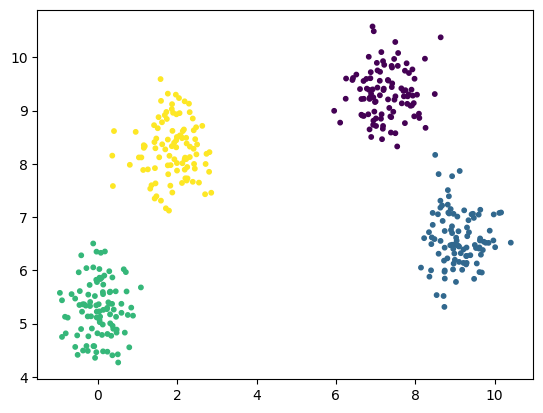

In [42]:
n = len(data)
pl.scatter([data[i][0][0] for i in range(n)], [data[i][0][1] for i in range(n)], c=[data[i][1] for i in range(n)], s=10)
pl.show()

### Обучающая и тестовая выборки

In [46]:
train_data = []
test_data  = []
for row in data:
    if random.random() < 0.3:
        test_data.append(row)
    else:
        train_data.append(row)